# 単純パーセプトロン  
* 学習データを2クラス分類するアルゴリズム  
* 入力に対する出力が教師データと異なる場合、「重み」を変更してから次の入力に進む。  
出力が教師データと同じ場合、「重み」はそのまま。  
これを繰り返して最適な「重み」を見つける。

# バイアス
* 単純パーセプトロンには、入力とひもづく「重み」がある。  
実際の計算では「重み」に「バイアス」という値を加えて、「重み」を特定の方向に偏らせることができる。
* 「バイアス」の値も学習中に調整される。

# 活性化関数
* 入力信号の総和がいくつになったら出力するかを決める関数  
* 一般的に、「単純パーセプトロン」は 1 か 0 を出力するので、活性化関数には「ステップ関数」が使われる。

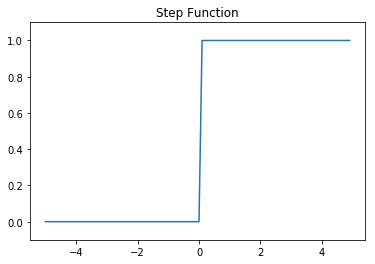

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-5.0, 5.0, 0.1)
y = np.array(x > 0)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('Step Function')
plt.show()

# 単純パーセプトロンの学習方法
* クラス1とクラス2を2分する直線のあるグラフを考える。  
* 直線を「決定境界」、直線でクラス分割できることを「線形分離可能」と言う。  
* 決定境界の直線は、未知のデータが入力されたとき、データがどちらのクラスに分類されるかを決める。  
この決定境界の直線を引くには、「重みベクトル係数」を求める必要がある。

## 重みベクトル係数の求め方
1. 最適な決定境界が引かれているとして、直線を境に正の側と負の側に分ける。  
正の側にあるのか負の側にあるのかを判断する関数を「識別関数」と言う。  
2. 負の側のデータを反転移動して正の側に移動する。  
⇒ 決定境界は、「重みベクトルを法線ベクトルとする直線」を求めればよい。
3. 「重みベクトルを法線ベクトルとする直線」を引くために、重みベクトルの係数 w を求める。  
この係数は「パラメータ」とも呼ばれる。
4. まず、適当な係数を用意して、「仮の決定境界」を引く。  
もともと正の側のラベルのデータはそのまま。負の側のラベルのデータは反転移動しておく。
5. 学習データを読み込み、正の側にある場合には、そのまま。  
負の側にある場合には、重みベクトルの係数を変更して傾きを回転させ、正の側にくるようにする。  
順々に学習データを読み込みながら、重みベクトルの係数を逐次調整する。
6. データの読み込みが完了すると、すべてのデータが正の側にくる。  
これにより、「重みベクトルを法線ベクトルとする直線」が引けることになる。
7. 反転してあったデータ（負の側のラベルのデータ）を再び反転させると、直線を2分する決定境界になっている、

# scikit-learn のパーセプトロン
* iris データセットの識別が可能かどうか試す。
* データを正規化して、値のバラツキを抑えて扱いやすくする。

In [100]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# データセットを StandardScaler にセット
sc.fit(X_train)

# データセットを正規化
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

パーセプトロンの学習モデルを生成する。  
パーセプトロンでは、重みベクトル w が少しずつ変更され、決定境界の直線が最適化されていく。  
* パラメータ eta0 は、1度にどれくらい傾かせるかを決める値。  
この値が小さいほど最適値に到達しやすくなるが、試行回数が増えて処理が遅くなる。  
何度か実行して効率の良いパラメータ値にすべきかもしれない。

In [101]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=100, eta0=0.01, random_state=0, shuffle=True, tol=1e-3)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

学習が完了したので、精度、誤分類した数、正解率を評価する。

In [102]:
y_pred = ppn.predict(X_test)

import numpy as np
from sklearn.metrics import accuracy_score
print('精度:{:.2f}'.format(np.mean(y_pred == y_test)))
print('誤分類した数:{}'.format((y_test != y_pred).sum()))
print('正解率:{:.2f}'.format(accuracy_score(y_test, y_pred)))

精度:0.89
誤分類した数:5
正解率:0.89


学習データは、いつも「線形分離可能」とは限らない。  
直線で分離できないものは「非線形分離可能」と言い、それに対応したアルゴリズムを使用する。  
例えば「ロジスティック回帰」や「サポートベクターマシン」を使うことになる。